In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class LinearRegression_Salah:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate   
        self.n_iters = n_iters          

    def fit(self, x, y):

        x = np.array(x).reshape(-1)
        y = np.array(y).reshape(-1)
      
        
        self.w = 0
        self.b = 0
        self.sse_array = [] 

        for i in range(self.n_iters):
            y_hat = self.w * x + self.b

            D_w = (2 / len(x)) * np.sum(x * (y_hat - y))
            D_b = (2 / len(x)) * np.sum(y_hat - y)

            self.w -= self.lr * D_w
            self.b -= self.lr * D_b

            sse = np.sum((y_hat - y) ** 2)
            self.sse_array.append(sse)

            if (i + 1) % 100== 0:  
                print(f"iteration {i+1}: sse={sse:.4f}")

    def predict(self, x):
        x = np.array(x).reshape(-1) 
        y_hat = self.w * x + self.b
        return y_hat


 

In [154]:
data = pd.read_csv(r"D:\AI\ai_deploma_master\ai_deploma_master\code\M_L\Salary_Data.csv")
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

model = LinearRegression_Salah(learning_rate=0.001, n_iters=1000)

model.fit(x, y)
y_hat = model.predict(x)
print(y_hat)

iteration 100: sse=4334848326.2140
iteration 200: sse=4059173721.8272
iteration 300: sse=3805915410.6128
iteration 400: sse=3573207834.4031
iteration 500: sse=3359383396.5467
iteration 600: sse=3162909818.1215
iteration 700: sse=2982379157.5188
iteration 800: sse=2816497721.0484
iteration 900: sse=2664076792.2509
iteration 1000: sse=2524024113.4835
[ 23107.78859877  25461.69260063  27815.59660248  33700.35660713
  36054.26060898  44292.92461548  45469.87661641  47823.78061826
  47823.78061826  53708.54062291  56062.44462476  57239.39662569
  57239.39662569  58416.34862662  63124.15663033  67831.96463405
  70185.8686359   72539.77263776  79601.48464333  80778.43664426
  90194.05265168  93724.90865447 103140.52466189 106671.38066468
 112556.14066932 116086.9966721  121971.75667675 123148.70867767
 131387.37268417 133741.27668603]


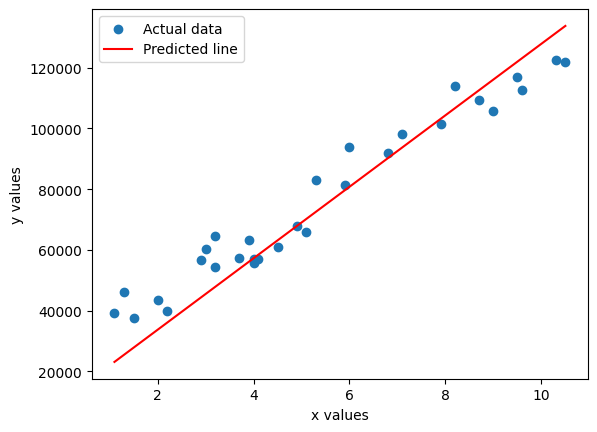

In [155]:
plt.scatter(x, y, label='Actual data')
plt.plot(x, y_hat, label='Predicted line', color='red')
plt.xlabel('x values')
plt.ylabel('y values')
plt.legend()
plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class LinearRegressionGD:
    def __init__(self, learning_rate=0.1, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.theta_1 = None
        self.theta_0 = None
        self.sse_history = []

    def fit(self, x, y):
        x = np.array(x).reshape(-1)
        y = np.array(y).reshape(-1)
        n_samples = len(x)

        self.theta_1 = 0.0
        self.theta_0 = 0.0
        self.sse_history = []

        for i in range(self.n_iters):
            y_hat = self.theta_1 * x + self.theta_0
            
            d_theta_1 = (2 / n_samples) * np.sum(x * (y_hat - y))
            d_theta_0 = (2 / n_samples) * np.sum(y_hat - y)

            self.theta_1 -= self.lr * d_theta_1
            self.theta_0 -= self.lr * d_theta_0

            sse = np.sum((y_hat - y) ** 2)
            self.sse_history.append(sse)

    def predict(self, x):
        x = np.array(x)
        return self.theta_1 * x + self.theta_0

    def plot_training(self, x, y):
        plt.figure(figsize=(12, 5))
        
        plt.subplot(1, 2, 1)
        plt.plot(range(self.n_iters), self.sse_history, 'b')
        plt.title('SSE over Iterations')
        plt.xlabel('Iterations')
        plt.ylabel('SSE')

        plt.subplot(1, 2, 2)
        plt.scatter(x, y, color='blue', label='Data Points')
        plt.plot(x, self.predict(x), color='red', label='Regression Line')
        plt.title('Regression Line')
        plt.xlabel('X')
        plt.ylabel('y')
        plt.legend()
        
        plt.show()




theta_0: 10173.939157448633
theta_1: 11767.64687290499
Prediction for 70m: 833909.2202607979


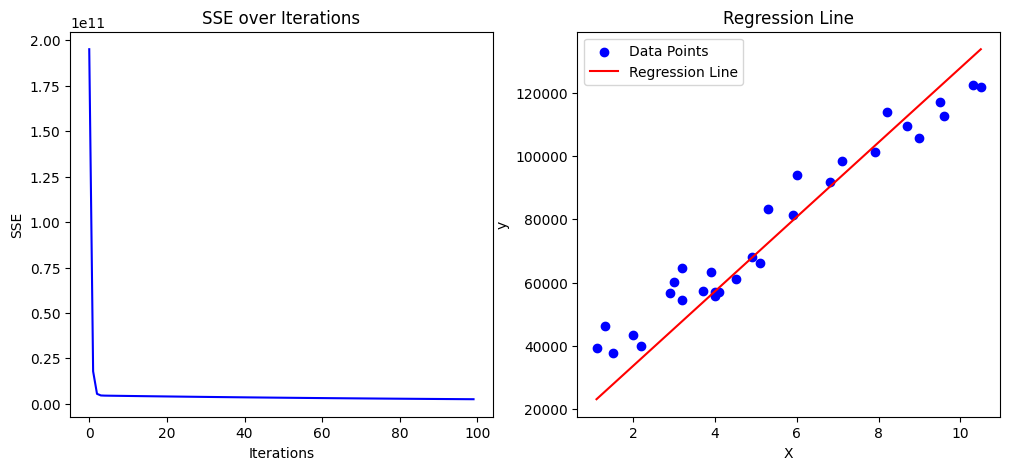

In [18]:
data = pd.read_csv("D:/AI/ai_deploma_master/ai_deploma_master/code/M_L/Salary_Data.csv")
X = data.iloc[:, :-1].values.flatten()
y = data.iloc[:, -1].values.flatten()

model = LinearRegressionGD(learning_rate=0.01, n_iters=100)
model.fit(X, y)

print(f"theta_0: {model.theta_0}")
print(f"theta_1: {model.theta_1}")

prediction = model.predict(70)
print(f"Prediction for 70m: {prediction}")

model.plot_training(X, y)